In [1]:
# GPU support
# MNIST
# DataLoader, Transformation
# Multilayer Neural Net, activation function
# Loss and Optimizer
# Training Loop (batch training)
# model evaluation

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

torch.Size([100, 1, 28, 28]) torch.Size([100])


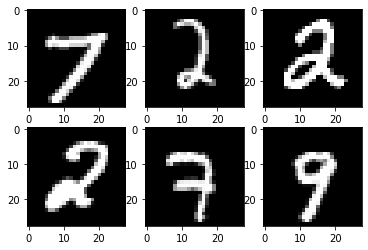

In [4]:
# MNIST
## download=True make sure it would be downloaded if it's not available
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# DataLoader, Transformation
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)
# torch.Size([100, 1, 28, 28]) torch.Size([100])
# [batch_size, num_channels, image_row, image_col] [batch_size]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray') # [0] 表示 channel， cmap=color map
plt.show()

In [5]:
# Multilayer Neural Net, activation function
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
            
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # 这里因为要使用 Cross Entropy，所以不用添加 Softmax
        return out
        
model = NeuralNet(input_size, hidden_size, num_classes)

In [6]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # now we have to reshape images first
        # batch_size=100, num_channel=1, 28, 28
        # num_samples=100, num_features=784=28x28
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # update parameters
        
        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")
            

epoch 1/2, step 100/600, loss = 0.4320
epoch 1/2, step 200/600, loss = 0.2565
epoch 1/2, step 300/600, loss = 0.3729
epoch 1/2, step 400/600, loss = 0.1541
epoch 1/2, step 500/600, loss = 0.2298
epoch 1/2, step 600/600, loss = 0.3415
epoch 2/2, step 100/600, loss = 0.1813
epoch 2/2, step 200/600, loss = 0.1648
epoch 2/2, step 300/600, loss = 0.1963
epoch 2/2, step 400/600, loss = 0.1819
epoch 2/2, step 500/600, loss = 0.1922
epoch 2/2, step 600/600, loss = 0.1290


In [8]:
# model evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
acc = 100.0 * n_correct / n_samples
print(f"Accuracy = {acc}")
        

Accuracy = 95.28
